# Практическая работа № 3. Классификация с помощью дерева решений

## Подготовил студент группы КЭ-401 Гордеев Александр Сергеевич

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# from google.colab import files

# data_files = files.upload()
# data_file_path = list(data_files.keys())[0]
# data = pd.read_csv(data_file_path, sep=", ")

In [3]:
data = pd.read_csv("adult.data.csv", sep=", ")
data.head()

C:\Users\sago0\AppData\Local\Temp\ipykernel_15920\4020471943.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("adult.data.csv", sep=", ")


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
non_dummy_columns = {
    "workclass": [
        "Private",
        "Self-emp-not-inc",
        "Self-emp-inc",
        "Federal-gov",
        "Local-gov",
        "State-gov",
        "Without-pay",
        "Never-worked",
    ],
    "education": [
        "Bachelors",
        "Some-college",
        "11th",
        "HS-grad",
        "Prof-school",
        "Assoc-acdm",
        "Assoc-voc",
        "9th",
        "7th-8th",
        "12th",
        "Masters",
        "1st-4th",
        "10th",
        "Doctorate",
        "5th-6th",
        "Preschool",
    ],
    "marital-status": [
        "Married-civ-spouse",
        "Divorced",
        "Never-married",
        "Separated",
        "Widowed",
        "Married-spouse-absent",
        "Married-AF-spouse",
    ],
    "occupation": [
        "Tech-support",
        "Craft-repair",
        "Other-service",
        "Sales",
        "Exec-managerial",
        "Prof-specialty",
        "Handlers-cleaners",
        "Machine-op-inspct",
        "Adm-clerical",
        "Farming-fishing",
        "Transport-moving",
        "Priv-house-serv",
        "Protective-serv",
        "Armed-Forces",
    ],
    "relationship": [
        "Wife",
        "Own-child",
        "Husband",
        "Not-in-family",
        "Other-relative",
        "Unmarried",
    ],
    "race": ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"],
    "sex": ["Female", "Male"],
    "native-country": [
        "United-States",
        "Cambodia",
        "England",
        "Puerto-Rico",
        "Canada",
        "Germany",
        "Outlying-US(Guam-USVI-etc)",
        "India",
        "Japan",
        "Greece",
        "South",
        "China",
        "Cuba",
        "Iran",
        "Honduras",
        "Philippines",
        "Italy",
        "Poland",
        "Jamaica",
        "Vietnam",
        "Mexico",
        "Portugal",
        "Ireland",
        "France",
        "Dominican-Republic",
        "Laos",
        "Ecuador",
        "Taiwan",
        "Haiti",
        "Columbia",
        "Hungary",
        "Guatemala",
        "Nicaragua",
        "Scotland",
        "Thailand",
        "Yugoslavia",
        "El-Salvador",
        "Trinadad&Tobago",
        "Peru",
        "Hong",
        "Holand-Netherlands",
    ],
    "salary": ["<=50K", ">50K"],
}
non_dummy_columns_mappings = {
    col: {value: idx for idx, value in enumerate(["?"] + values)}
    for col, values in non_dummy_columns.items()
}

In [5]:
data_dummy = data.copy()
for col, mapping in non_dummy_columns_mappings.items():
    data_dummy[col] = data_dummy[col].map(mapping)

data_dummy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,1
1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,1
2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,1
3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,1
4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,1


In [6]:
def train_decision_tree(data, criterion, test_size=0.2, random_state=42):
    x = data.drop("salary", axis=1)
    y = data["salary"]
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state
    )

    clf = DecisionTreeClassifier(criterion=criterion)
    clf.fit(x_train, y_train)

    return clf

In [7]:
def calculate_metrics(clf, data, test_size=0.2, random_state=42):
    x = data.drop("salary", axis=1)
    y = data["salary"]
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state
    )

    y_pred = clf.predict(x_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average="binary"
    )
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [8]:
def print_clf(clf):
    print(f"Количество узлов в дереве: {clf.tree_.node_count}")

    print("Атрибуты узлов дерева:")
    for i, (feature, threshold) in enumerate(
        zip(clf.tree_.feature, clf.tree_.threshold)
    ):
        if feature != -2:
            print(f"Узел {i}: атрибут {data_dummy.columns[feature]}, порог {threshold}")

In [9]:
def plot_clf(clf, figsize=(120, 10)):
    plt.figure(figsize=figsize)
    plot_tree(clf, feature_names=data_dummy.columns, filled=True)
    plt.show()

In [10]:
data_dummy_small = data_dummy.copy().filter(["workclass", "education", "salary"])
data_dummy_small.head()

,workclass,education,salary
0,6,1,1
1,2,1,1
2,1,4,1
3,1,3,1
4,1,1,1


In [11]:
criterion = "log_loss"  # Information gain
# criterion = 'entropy' # Information gain
# criterion = 'gini' # Gini index

In [12]:
clf = train_decision_tree(data_dummy_small, criterion)

In [13]:
accuracy, precision, recall, f1 = calculate_metrics(clf, data_dummy_small)
print(f"Аккуратность: {accuracy:.2f}")
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F-мера: {f1:.2f}")

Аккуратность: 0.78
Точность: 0.80
Полнота: 0.96
F-мера: 0.87


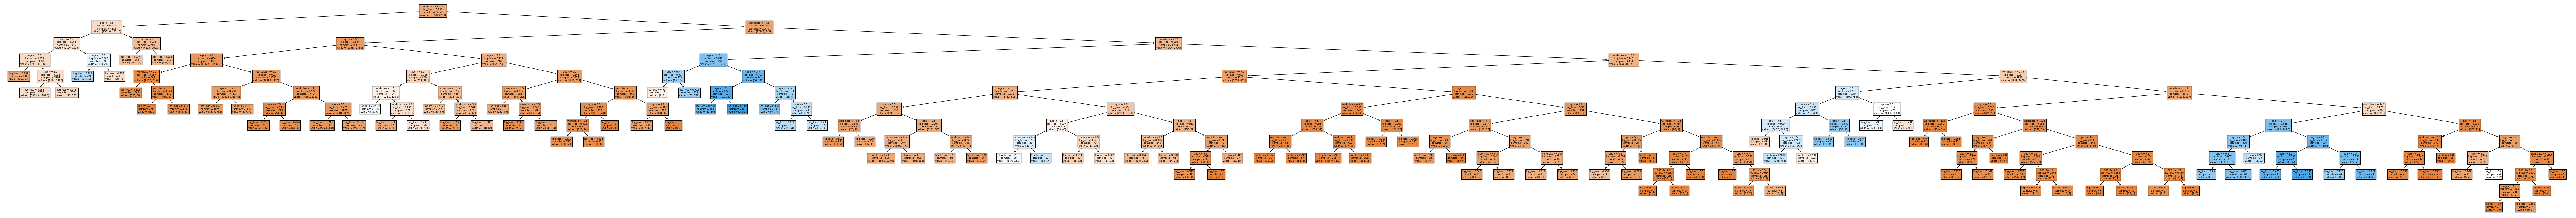

In [15]:
# print_clf(clf)
plot_clf(clf)

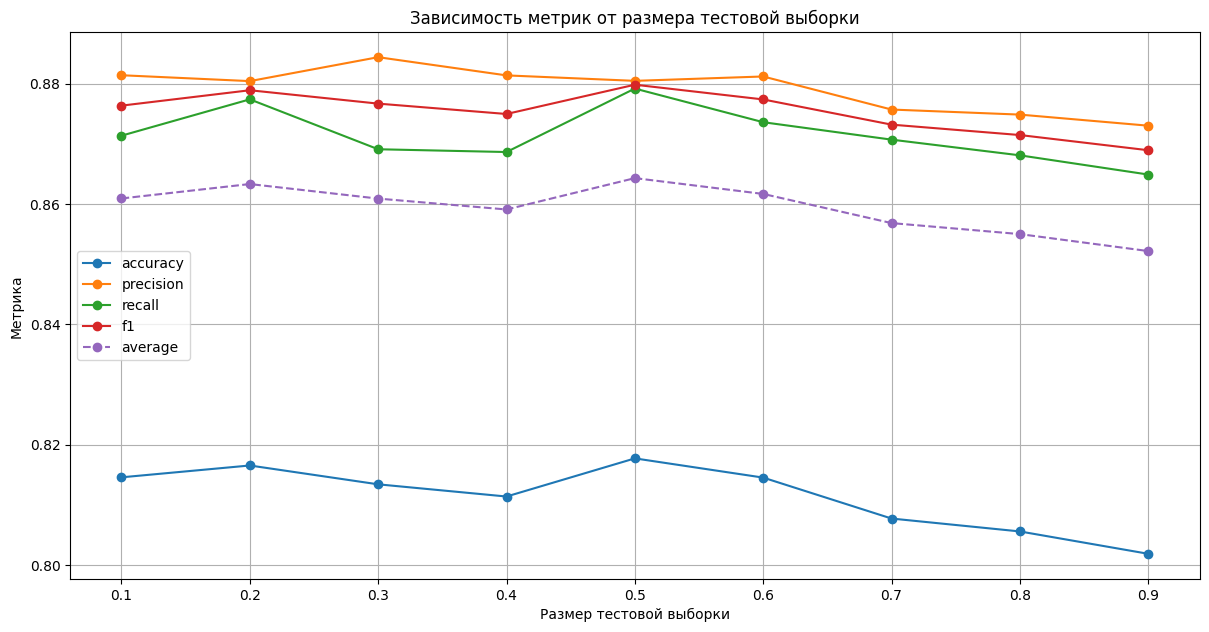

In [16]:
test_sizes = [0.1 * i for i in range(1, 10)]  # 10%..90%
test_sizes_results = {}
for test_size in test_sizes:
    clf = train_decision_tree(data_dummy, criterion, test_size=test_size)
    accuracy, precision, recall, f1 = calculate_metrics(
        clf, data_dummy, test_size=test_size
    )
    test_sizes_results[test_size] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "average": (accuracy + precision + recall + f1) / 4,
    }

metrics = ["accuracy", "precision", "recall", "f1", "average"]

plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(
        test_sizes,
        [result[metric] for result in test_sizes_results.values()],
        label=metric,
        linestyle="--" if metric == "average" else "-",
        marker="o",
    )

plt.grid(which="major")
plt.tight_layout()

plt.xlabel("Размер тестовой выборки")
plt.ylabel("Метрика")
plt.title("Зависимость метрик от размера тестовой выборки")
plt.legend()
plt.show()